In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Lauren Wood")

My name is Lauren Wood


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [2]:
import numpy as np

from numpy import random

def rains(rain):
    
    if rain <= 0.20:
        return True
    else:
        return False


In [3]:
ndays = 30

nmonths = 100000

totalDays = 0
totalMonths = 0


for j in range(0,nmonths):
    
    
    for i in range(0,ndays):
        
        rain = np.random.random()
       
        if rains(rain) == True:
            
            totalDays += 1   
            
            
    if totalDays == 1:

        totalMonths += 1.
        
    totalDays = 0;
    

print "The probability that it rains once and only once in a month is %0.6f percent." %((totalMonths/float(nmonths))*100.)

The probability that it rains once and only once in a month is 0.932000 percent.


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach

In [4]:
def rainsless(rain):
    
    if rain <= 0.10:
        return True
    else:
        return False
                    

In [25]:
ndays = 30

nmonths = 100000


totalDayst = 0
totalMonthst = 0


for j in range(0,nmonths):
    
    
    for i in range(0,ndays):
        
        rain = np.random.random()
       
        if rainsless(rain) == True:
            
            totalDayst += 1
  
            
    if totalDayst >= 8:

        totalMonthst += 1.
        
    totalDayst = 0; #After each month, this needs to be reset
    # So it only counts the days rained in that specific month

print "The probability that it rains 8 times in a month is %0.6f percent." %((totalMonthst/float(nmonths))*100.)

The probability that it rains 8 times in a month is 0.748000 percent.


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [6]:
def raining(Daysrain):
    #takes in number of days it rains and returns total amount of rain
    
    amt_rainfall = 0
    totalrain = 0
    
    for i in range(0, Daysrain):
        
        rain = np.random.random()
        
        for j in range(0,1): 
            if rain >= 0 and rain <= 0.10:
                amt_rainfall += 4 
            
                break
            
            if rain < 0.10:
                amt_rainfall += 5
                break
        
            if rain >= 0.10 and rain <= 0.20:
                amt_rainfall += 1
                break     
        
            elif rain > 0.20 and rain <= 0.30:
                amt_rainfall += 2
            
                if rain > 0.20 and rain < 0.30:
                    amt_rainfall += 3
                    break 
    return amt_rainfall

In [7]:
from numpy import random

Daysrain = 0
monthslotofrain = 0

nmonthsless = 10000

for j in range(0,nmonthsless):
    
    my_randoms=[]

    for k in range(ndays):

        my_randoms.append(random.uniform(0,1))

    numbers = my_randoms

    for i in range(0,len(numbers)):    
            
        if [i+1] <= 0.10:
            Daysrain += 1
            
            if Daysrain == 1 and [i] <= 0.20:
                Daysrain += 2
                
                if Daysrain == 2 and [i-1] <= 0.25:
                    Daysrain += 3
                    
                    if Daysrain >= 3 and [i-2] <= 0.05:
                        Daysrain += 4
        
        elif i <= 0.10 and Daysrain == 0:
            Daysrain += 1          
    
    if raining(Daysrain) >= 10:
    
        monthslotofrain += 1
        

print "%0.6f" % (monthslotofrain/float(nmonthsless)*100)

0.000000


### 3b (10 pts)

Make a histogram of the distribution of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


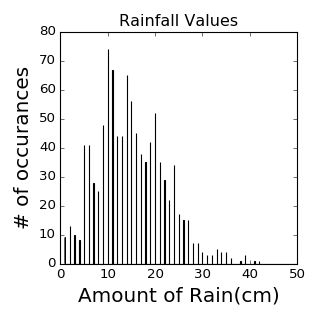

In [24]:
import matplotlib.pylab as plt

%matplotlib notebook

nmonthstested = 1000 # The number of times we roll the die
Daysrain = 15
values = []
for i in range(0,nmonthstested):
    
    value = raining(Daysrain)
    values.append(value)
    
plt.figure(figsize=(4,4))
plt.hist(values,bins=1000,range=(1,50), align='mid') 
# Note that the way we have done this with the range of values, the low edge of a bin represents the side of the die

plt.xlabel("Amount of Rain(cm)",fontsize=18)
plt.ylabel("# of occurances",fontsize=18)
plt.title("Rainfall Values")
plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [ ]:
# Your code here